In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
// y_2 = phase2 >= err2 ? 1 : 0;
//   err2 = (y_2 ? wavelen2 : 0) - phase2 + err2;
//   gpio_put(OSC3_PIN, y_2);

In [166]:
(125000000/8) / 20

781250.0

In [167]:
wavelen=781250

In [168]:
x = arange(wavelen)

In [169]:
len(x)

781250

In [170]:
125000000/8 / 20

781250.0

In [171]:
y=0
err=0
phase=0

bs = zeros_like(x)
for i in range(len(bs)):
    y = 1 if phase >= err else 0
    err = ((wavelen) if y else 0) - phase + err
    phase = phase + 1
    if (phase >= wavelen):
        phase=0
    bs[i] = y

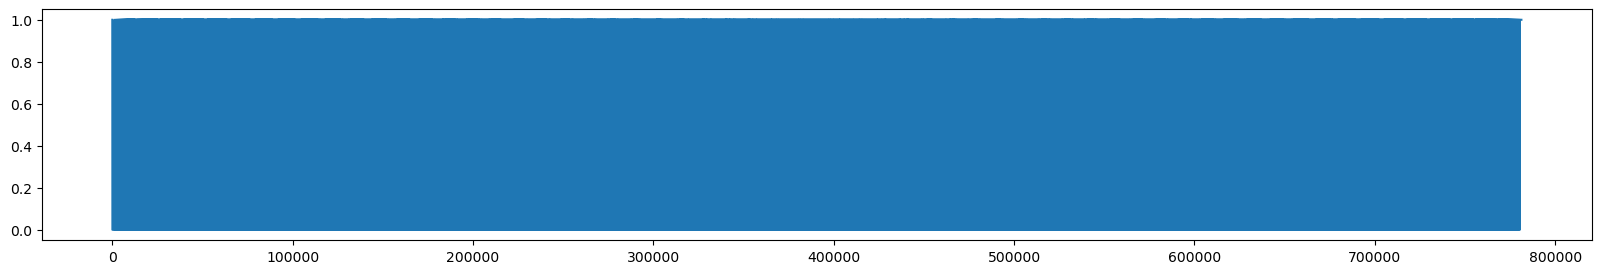

In [172]:
figsize(20,3)
plot(bs)

In [173]:
range(10)[0]

0

In [174]:
def bsToFlipTable(x):
    prevx=x[0]
    sectionlen=1
    flipTable = []
    for i in range(1, len(x)-1):
        if x[i] != prevx:
            flipTable.append(sectionlen)
            sectionlen=1
        else:
            sectionlen = sectionlen + 1
        prevx = x[i]
    return flipTable

In [175]:
ft = bsToFlipTable(bs)
len(ft)

390626

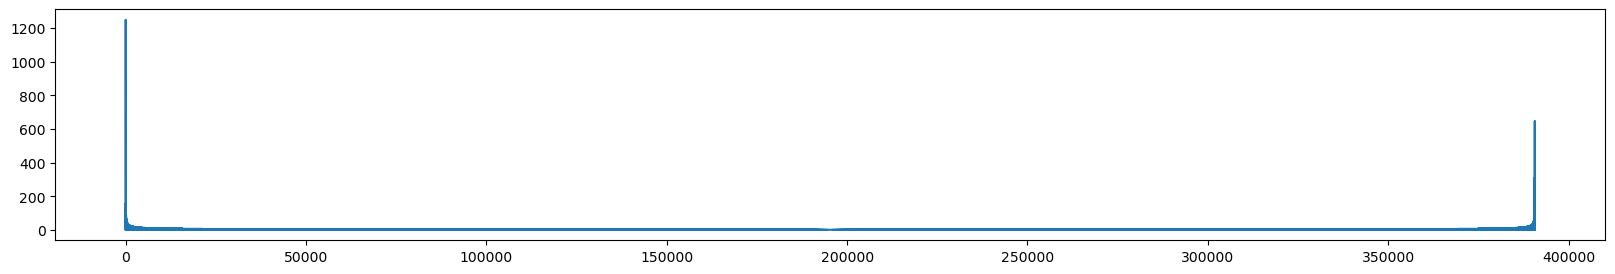

In [176]:
plot(ft)

In [177]:
ft

[1,
 1249,
 1,
 517,
 1,
 396,
 1,
 334,
 1,
 294,
 1,
 266,
 1,
 244,
 1,
 228,
 1,
 213,
 1,
 202,
 1,
 192,
 1,
 183,
 1,
 176,
 1,
 169,
 1,
 163,
 1,
 158,
 1,
 153,
 1,
 148,
 1,
 145,
 1,
 140,
 1,
 137,
 1,
 134,
 1,
 131,
 1,
 128,
 1,
 125,
 1,
 123,
 1,
 120,
 1,
 118,
 1,
 116,
 1,
 115,
 1,
 112,
 1,
 110,
 1,
 109,
 1,
 107,
 1,
 105,
 1,
 104,
 1,
 102,
 1,
 102,
 1,
 99,
 1,
 99,
 1,
 97,
 1,
 96,
 1,
 95,
 1,
 94,
 1,
 92,
 1,
 92,
 1,
 91,
 1,
 89,
 1,
 89,
 1,
 88,
 1,
 87,
 1,
 86,
 1,
 85,
 1,
 85,
 1,
 83,
 1,
 83,
 1,
 82,
 1,
 82,
 1,
 80,
 1,
 80,
 1,
 80,
 1,
 79,
 1,
 78,
 1,
 77,
 1,
 77,
 1,
 76,
 1,
 76,
 1,
 75,
 1,
 74,
 1,
 74,
 1,
 74,
 1,
 73,
 1,
 72,
 1,
 72,
 1,
 71,
 1,
 71,
 1,
 71,
 1,
 70,
 1,
 69,
 1,
 69,
 1,
 69,
 1,
 68,
 1,
 68,
 1,
 67,
 1,
 67,
 1,
 67,
 1,
 66,
 1,
 66,
 1,
 65,
 1,
 66,
 1,
 64,
 1,
 65,
 1,
 64,
 1,
 63,
 1,
 63,
 1,
 63,
 1,
 63,
 1,
 62,
 1,
 62,
 1,
 62,
 1,
 61,
 1,
 61,
 1,
 61,
 1,
 61,
 1,
 60,
 1,
 60,
 1,
 59

In [178]:
390626 * 2 / 1024

762.94140625